# Civilization 6 Players - Simulation 
# Author: Lu (Christina) Jin

# Setup: Import all libraries

In [1]:
import os
import io
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import scipy as scipy

import statsmodels.api as sm
from matplotlib.ticker import PercentFormatter
from scipy import stats
from pylab import rcParams
rcParams['figure.figsize'] = (20, 10)
sns.set_style('darkgrid')
plt.style.use('seaborn-darkgrid')

# Acquiring Dataset 

In [84]:
# Read data
civ6_players_path = r'C:\Users\Lu_ki\OneDrive - Northeastern University\NU Master Courseworks\ALY6050\Course Materials\Module 1\M1 Project 1\civ6_players.xlsx'
civ6 = pd.read_excel(civ6_players_path)
civ6

,PLAYERID,INSTALLDATE,ACTIVEDAYS,LASTACTIVEDAY,LEADERMOSTSELECTED,CIVILIZATIONMOSTSELECTED,POLAND,NUBIA,KHMER_AND_INDONESIA,GATHERING_STORM,PERSIA_AND_MACEDON,VIKINGS,RISE_AND_FALL,AUSTRALIA
0,3316379,2018-01-05,1,2018-01-05,LEADER_GILGAMESH,CIVILIZATION_SUMERIA,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
1,3316386,2018-01-05,3,2018-01-09,LEADER_TRAJAN,CIVILIZATION_ROME,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
2,3316394,2018-01-05,115,2018-07-08,LEADER_T_ROOSEVELT,CIVILIZATION_AMERICA,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
3,3888460,2018-03-04,112,2019-10-05,LEADER_HOJO,CIVILIZATION_JAPAN,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
4,3940600,2018-03-12,1,2018-03-12,LEADER_PALA,CIVILIZATION_PALA,NaT,NaT,2018-03-12,NaT,NaT,NaT,NaT,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,2969114,2017-11-12,11,2019-06-06,LEADER_CLEOPATRA,CIVILIZATION_EGYPT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
499996,2945770,2017-11-04,2,2018-02-05,LEADER_BARBAROSSA,CIVILIZATION_GERMANY,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
499997,2945778,2017-11-04,4,2017-11-11,LEADER_QIN,CIVILIZATION_CHINA,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
499998,3309420,2018-01-04,6,2018-01-11,LEADER_VICTORIA,CIVILIZATION_ENGLAND,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT


In [85]:
civ6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   PLAYERID                  500000 non-null  int64         
 1   INSTALLDATE               500000 non-null  datetime64[ns]
 2   ACTIVEDAYS                500000 non-null  int64         
 3   LASTACTIVEDAY             500000 non-null  datetime64[ns]
 4   LEADERMOSTSELECTED        500000 non-null  object        
 5   CIVILIZATIONMOSTSELECTED  500000 non-null  object        
 6   POLAND                    44665 non-null   datetime64[ns]
 7   NUBIA                     29385 non-null   datetime64[ns]
 8   KHMER_AND_INDONESIA       26678 non-null   datetime64[ns]
 9   GATHERING_STORM           68484 non-null   datetime64[ns]
 10  PERSIA_AND_MACEDON        60841 non-null   datetime64[ns]
 11  VIKINGS                   18670 non-null   datetime64[ns]
 12  RI

# Q1: Randomly select 1000 players from this data set and compare this sample's average active days per player,  with the population's average active days per player.

In [89]:
# randomly select 1000 players from the dataset
civ6_sample_1k = civ6.sample(n=1000, random_state=100)

In [90]:
# Sample's average active days per player
sample_1k_avg_day = civ6_sample_1k['ACTIVEDAYS'].mean()
print("Sample average active days is :", sample_1k_avg_day)

Sample average active days is : 19.792


In [88]:
# Population's average active days per player
pop_avg_day = civ6['ACTIVEDAYS'].mean()
print("Population average active days is :", pop_avg_day)

Population average active days is : 23.5908


In [91]:
# percentage of difference
print("Percentage of difference is:", round((1 - sample_1k_avg_day/pop_avg_day)*100,2),"%")

Percentage of difference is: 16.1 %


# Q2: Randomly select 100000 players from this data set and compare this sample's average active days per player,  with the population's average active days per player.

In [48]:
# randomly select 100000 players from the dataset
civ6_sample_100k = civ6.sample(n=100000, random_state=100)

In [49]:
# Sample's average active days per player
sample_100k_avg_day = civ6_sample_100k['ACTIVEDAYS'].mean()
print("Sample average active days is :", sample100k_avg_day)

Sample average active days is : 23.59811


In [52]:
# percentage of difference
print("Percentage of difference is:", round((1 - sample100k_avg_day/population_avg_day)*100,2),"%")

Percentage of difference is: -0.03 %


# Q3: Which sample was a better estimator the population parameter for average active days per player?

> ### Compare Average Active Days Between Sample Set of 1000, Sample Set of 100000 and Population:
> The average active days per player of the randomly selected (which has a controled random state) 1000-player sample set is 19.79, while the population's average is 23.59. Although the two numbers are quite close, but there are still 16% difference.

> On the other side, the average active days per player of the randomly selected (which has a controled random state) 100000-player sample set is 23.5981. We can see it has a much more closer numerical value of the average with the population and only as little as 0.03% of difference. 

> It's not hard to tell the second sample set with 100000 randomly selected players is a way better estimartor for population's average active days. Therefore, we can conclude that sample sets with more samples selected is a more precise estimartor of parameters of the population.

# Q4: Randomly select 1000 samples with sample size 1000 and plot the histogram of "average active days per player" of each sample.

In [140]:
# create a subset data frame which only consist input of 'ACTIVEDAYS'
civ6_active_days = pd.DataFrame(civ6_players['ACTIVEDAYS'])
civ6_active_days

ACTIVEDAYS    1
dtype: int64
ACTIVEDAYS    1081
dtype: int64


,ACTIVEDAYS
0,1
1,3
2,115
3,112
4,1
...,...
499995,11
499996,2
499997,4
499998,6


In [98]:
# run 1000 times of selecting 1000 samples, and save the mean to another data frame
avg_1 = []
for i in range(1000):
    civ6_sample_1k = civ6_active_days.sample(n=1000)
    sample_1k_avg_days = civ6_sample_1k.mean()
    avg_1.append(sample_1k_avg_days)
    
sample_1_avg_df = pd.DataFrame(avg_1)
sample_1_avg_df

,ACTIVEDAYS
0,24.244
1,24.556
2,21.527
3,22.819
4,23.857
...,...
995,25.419
996,21.763
997,23.923
998,25.092


In [144]:
print(sample_1_avg_df.min())
print(sample_1_avg_df.max())

ACTIVEDAYS    19.164
dtype: float64
ACTIVEDAYS    28.523
dtype: float64


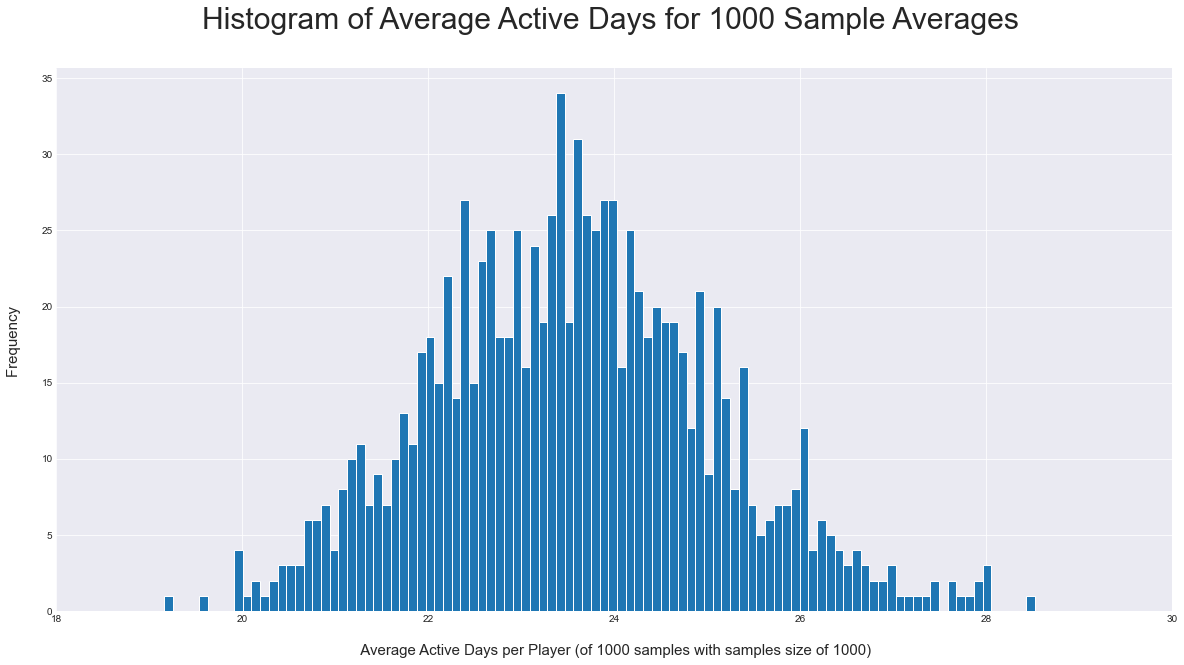

In [149]:
# plot the histogram for each of the 1000 samples of average active days
fig,ax_1 = plt.subplots()

plt.hist(sample_1_avg_df,bins=100)
ax_1.set_xlim(18,30)
ax_1.set_xlabel("\n Average Active Days per Player (of 1000 samples with samples size of 1000)",fontsize=15)
ax_1.set_ylabel("Frequency \n", fontsize=15)
ax_1.set_title("Histogram of Average Active Days for 1000 Sample Averages \n", fontsize=30)

plt.show()

# Q5: Randomly select 10000 samples with sample size 1000 and plot the histogram of "average active days per player" of each sample.

In [101]:
# run 10000 times of selecting 1000 samples, and save the mean to another data frame
avg_2 = []
for i in range(10000):
    civ6_sample_1k = civ6_active_days.sample(n=1000)
    sample_1k_avg_days = civ6_sample_1k.mean()
    avg_2.append(sample_1k_avg_days)
    
sample_2_avg_df = pd.DataFrame(avg_2)
sample_2_avg_df

,ACTIVEDAYS
0,26.164
1,22.791
2,24.387
3,24.864
4,23.535
...,...
9995,25.551
9996,21.181
9997,23.635
9998,24.977


In [145]:
print(sample_2_avg_df.min())
print(sample_2_avg_df.max())

ACTIVEDAYS    18.317
dtype: float64
ACTIVEDAYS    30.184
dtype: float64


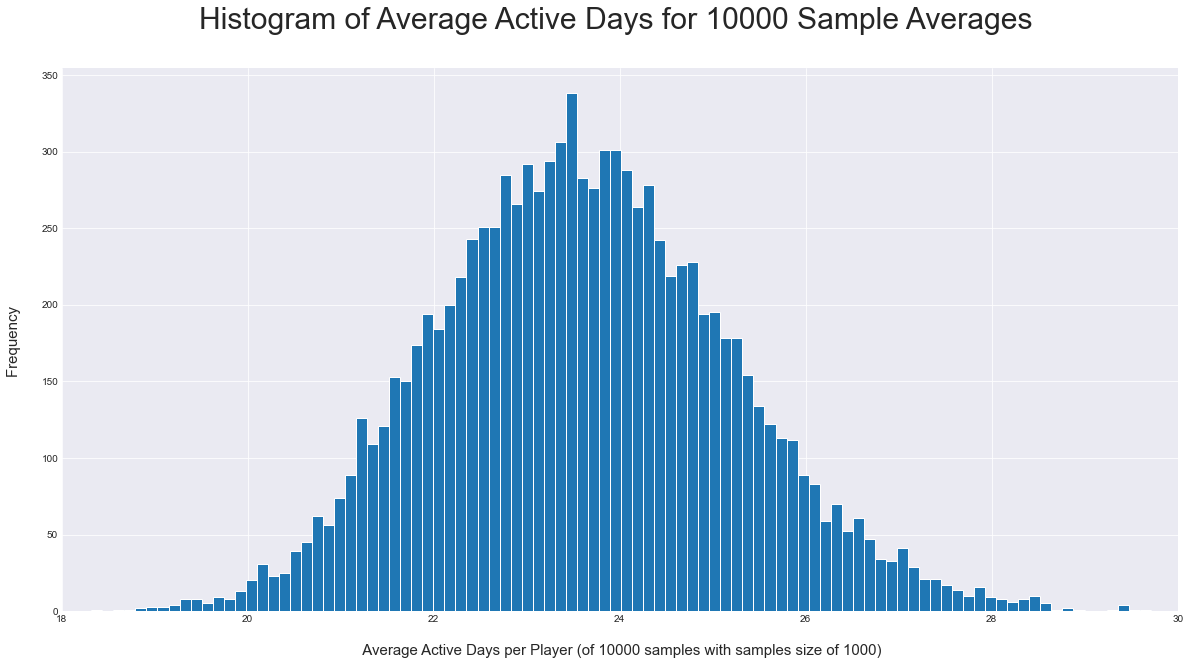

In [148]:
# plot the histogram for each of the 10000 samples of average active days
fig,ax_2 = plt.subplots()

plt.hist(sample_2_avg_df,bins=100)
ax_2.set_xlim(18,30)
ax_2.set_xlabel("\n Average Active Days per Player (of 10000 samples with samples size of 1000)",fontsize=15)
ax_2.set_ylabel("Frequency \n", fontsize=15)
ax_2.set_title("Histogram of Average Active Days for 10000 Sample Averages \n", fontsize=30)

plt.show()

# Q6: Plot the histogram of "active days" for entire population. (Use the same parameters as bins with Q4-5 histograms and compare these 3 histograms

In [143]:
print(civ6_active_days.min())
print(civ6_active_days.max())

ACTIVEDAYS    1
dtype: int64
ACTIVEDAYS    1081
dtype: int64


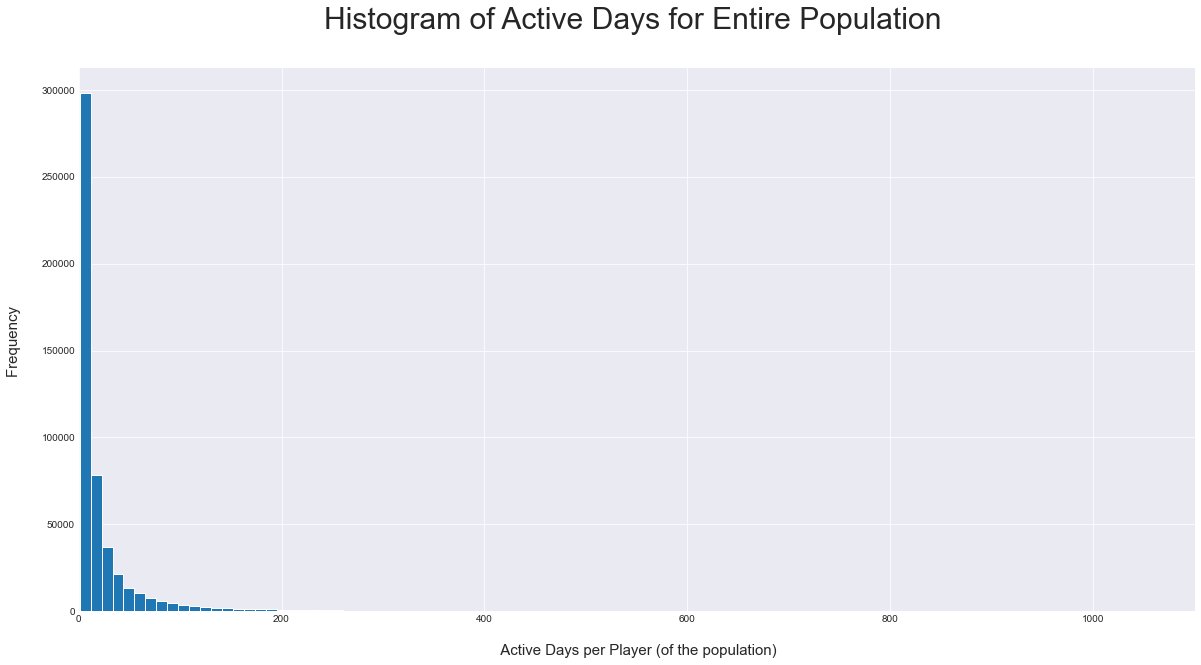

In [142]:
fig,ax = plt.subplots()

plt.hist(civ6_active_days,bins=100)
ax.set_xlim(0,1100)
ax.set_xlabel("\n Active Days per Player (of the population)",fontsize=15)
ax.set_ylabel("Frequency \n", fontsize=15)
ax.set_title("Histogram of Active Days for Entire Population \n", fontsize=30)

plt.show()

# Q7: Tell me what you see if you compare Q4-Q5 and Q6 histograms. What is your insight?



> ### Compare the Histogram of Q4, Q5, and Q6
> Note: Q4, Q5, and Q6 are histogram plots of average active days between sample set of 1000, sample set of 10000 and population active days respectively.

> First of all, Q6 is a completely different histogram from Q4 and Q5, thus we will first take a look at Q4 and Q5. Similarities between these two graphs are: 1) Both graphys are pretty close to normal distribution. 2) both graphs have pretty similar range of average active days. 3) the mode for average active days for both graphs are very close, around 23.3 days.
> Differences are as follows: 1) Q5 has a more perfect normal distribution than Q4. 2) the frequency of Q5 is about 10 times of the Q4, which makes sense because Q5's sample size is 10 times of the Q4.

> Secondly, looking at Q6, Q6 is not a normal distribution. It's highly left skewed where more than 90% of the data are in the range of 0 to 200 days, although the highest data point is at 1081.This means almost all of the players never played the game more than 200 days. And most people only played no more than 25 days. 

> This corresponds with the mean and mode of the histograms of Q4 and Q5. And my takeaways is the more samples we select, the closer it is to the population mean. 